<a href="https://colab.research.google.com/github/BradleyRossCodes/Minimum_Wage_Colab/blob/main/minimum_wage_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Minimum Wage: State and Federal Wage Requirements**

![fg](https://cepr.org/sites/default/files/styles/16_9_large/public/voxeu-cover-image/AdobeStock_119680458.webp?itok=uXd_H6KG)

**includes:**

*   Exploration of State and Federal Minimum Wage Laws.
*   Line graph of changes in state and federal laws from 1968 to 2020.
*   Consideration of Consumer Price Index (CPI) and modern-day equivalent wages since 1968.
*   Histogram of individual state laws (for states with minimum wage requirements) compared to other states' laws.
*   T-test analysis to identify states with minimum wage laws that are significantly different from the average.
*   Use of Linear Regression to predict future increases in the federal minimum wage."






In [ ]:
# Importing necessary module
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing necessary libraries
import pandas as pd  # Data manipulation
import matplotlib.pyplot as plt  # Data visualization
import numpy as np  # Numerical operations
import scipy.stats as stats  # Statistical calculations
from scipy.stats import ttest_1samp  # One-sample t-tests
from sklearn.linear_model import LinearRegression  # Linear regression modeling
from sklearn.model_selection import train_test_split  # Splitting data
from sklearn.metrics import mean_squared_error, r2_score  # Model evaluation

# File paths for data files
cpi_path = '/content/drive/MyDrive/Colab Notebooks/wage_datasets/cpi.csv'  # CPI data
fed_path = '/content/drive/MyDrive/Colab Notebooks/wage_datasets/fed_minimum_wage.csv'  # Federal minimum wage data
state_path = '/content/drive/MyDrive/Colab Notebooks/wage_datasets/state_minimum_wage.csv'  # State minimum wage data

# Reading data from CSV files into DataFrames
cpi = pd.read_csv(cpi_path)  # Read CPI data
federal = pd.read_csv(fed_path)  # Read federal minimum wage data
state = pd.read_csv(state_path)  # Read state minimum wage data

In [ ]:
# Display the first 5 rows of the 'state' DataFrame
print(state.head(5))

# Display the first 5 rows of the 'federal' DataFrame
print(federal.head(5))

# Display the first 5 rows of the 'cpi' DataFrame
print(cpi.head(5))

   year       state  state_minimum_wage
0  1968     Alabama             0.00000
1  1968      Alaska             2.10000
2  1968     Arizona             0.46800
3  1968    Arkansas             0.15625
4  1968  California             1.65000
   year  federal_minimum_wage
0  1968                  1.15
1  1968                  1.15
2  1968                  1.15
3  1968                  1.15
4  1968                  1.15
   year  cpi_average
0  1968         34.8
1  1968         34.8
2  1968         34.8
3  1968         34.8
4  1968         34.8


In [ ]:
# Remove duplicate rows in the 'federal' DataFrame based on the 'year' column
federal = federal.drop_duplicates(subset='year')

# Remove duplicate rows in the 'cpi' DataFrame based on the 'year' column
cpi = cpi.drop_duplicates(subset='year')

# Merge 'state' with 'federal' based on the 'year' column
minimum_wage = state.merge(federal, how='inner', on='year')

# Merge the result with 'cpi' based on the 'year' column
minimum_wage = minimum_wage.merge(cpi, how='inner', on='year')

# Get unique values in the 'state' column of 'minimum_wage'
distinct_states = minimum_wage['state'].unique()

In [ ]:
# Get unique values in the 'state' column of 'minimum_wage'
distinct_states = minimum_wage['state'].unique()

# Print the number of distinct states and the list of distinct states
print(f"Number of states: {len(distinct_states)}")
print(distinct_states)

Number of states: 54
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Guam' 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Puerto Rico' 'Rhode Island'
 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'U.S. Virgin Islands'
 'Utah' 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin'
 'Wyoming']


**In addition to the 50 states of America, the U.S. territories of Guam, Puerto Rico, and the U.S. Virgin Islands, as well as the District of Columbia, are included in the data frame.**

In [ ]:
# Function to identify the average minimum wage in the target year.

def avg_state_law(df, year):
    # Filter data for the specified year
    year_data = df[df['year'] == year]

    # Calculate the total minimum wage across all states for the year
    total_wage = year_data['state_minimum_wage'].sum()

    # Count the number of distinct states with minimum wage data for the year
    distinct_states = year_data['state'].nunique()

    # Check for data integrity and return an error message if no states are found
    if distinct_states == 0:
        return 'error'

    # Calculate the average minimum wage for the year
    average_wage = total_wage / distinct_states

    # Return a formatted message with the average minimum wage for the year
    return f"The U.S. averaged a minimum wage requirement of ${round(average_wage, 2)} in {year} based on state laws."

In [ ]:
# List of years for average minimum wage calculation
years = [1968, 1978, 1988, 1998, 2008, 2018, 2020]

# Calculate and print the average minimum wage for each year
for year in years:
    print(avg_state_law(minimum_wage, year))

The U.S. averaged a minimum wage requirement of $0.82 in 1968 based on state laws.
The U.S. averaged a minimum wage requirement of $1.55 in 1978 based on state laws.
The U.S. averaged a minimum wage requirement of $2.6 in 1988 based on state laws.
The U.S. averaged a minimum wage requirement of $4.16 in 1998 based on state laws.
The U.S. averaged a minimum wage requirement of $5.74 in 2008 based on state laws.
The U.S. averaged a minimum wage requirement of $7.56 in 2018 based on state laws.
The U.S. averaged a minimum wage requirement of $8.19 in 2020 based on state laws.


In [ ]:
# Create a column reflecting the legal wage requirement based on the maximum of 'state_minimum_wage' and 'federal_minimum_wage'
minimum_wage['fed_state_wage'] = minimum_wage[['state_minimum_wage', 'federal_minimum_wage']].max(axis=1)

In [ ]:
# Function to identify the average minimum wage considered both state and federal law in the target year.

def avg_fed_state_law(df, year):
    # Filter data for the specified year
    year_data = df[df['year'] == year]

    # Calculate the total minimum wage based on 'fed_state_wage' for the year
    total_wage = year_data['fed_state_wage'].sum()

    # Count the number of distinct states with minimum wage data for the year
    distinct_states = year_data['state'].nunique()

    # Check for data integrity and return an error message if no states are found
    if distinct_states == 0:
        return 'error'

    # Calculate the average minimum wage for the year
    average_wage = total_wage / distinct_states

    # Return a formatted message with the average minimum wage for the year, considering both state and federal laws
    return f"When considering the impact of state and federal minimum wage laws, the average minimum wage across all states averaged ${round(average_wage, 2)} in {year}."

In [ ]:
# Calculate and print the average state and federal minimum wage for each year
for year in years:
    print(avg_fed_state_law(minimum_wage, year))

When considering the impact of state and federal minimum wage laws, the average minimum wage across all states averaged $1.25 in 1968.
When considering the impact of state and federal minimum wage laws, the average minimum wage across all states averaged $2.23 in 1978.
When considering the impact of state and federal minimum wage laws, the average minimum wage across all states averaged $3.41 in 1988.
When considering the impact of state and federal minimum wage laws, the average minimum wage across all states averaged $5.2 in 1998.
When considering the impact of state and federal minimum wage laws, the average minimum wage across all states averaged $6.55 in 2008.
When considering the impact of state and federal minimum wage laws, the average minimum wage across all states averaged $8.51 in 2018.
When considering the impact of state and federal minimum wage laws, the average minimum wage across all states averaged $9.08 in 2020.


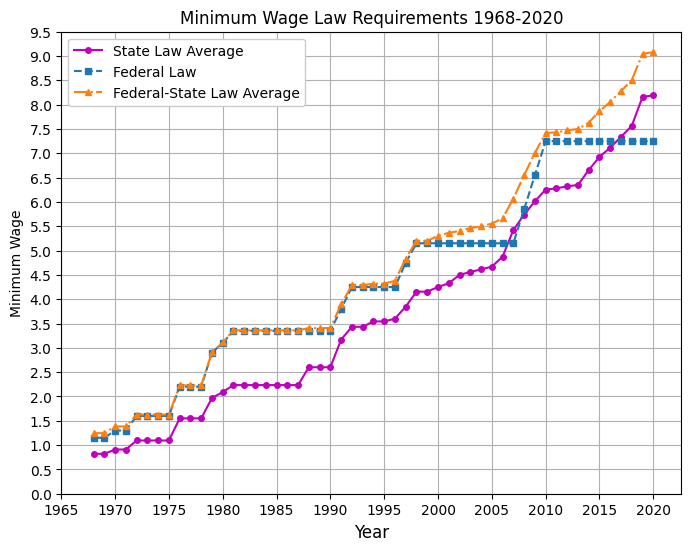

In [ ]:
# Calculate the average minimum wage based on state laws for each year
average_state_wage_by_year = minimum_wage.groupby('year')['state_minimum_wage'].mean().reset_index()

# Calculate the average federal minimum wage for each year
average_federal_wage_by_year = minimum_wage.groupby('year')['federal_minimum_wage'].mean().reset_index()

# Calculate the average legal minimum wage of all states for each year
average_legal_wage_by_year = minimum_wage.groupby('year')['fed_state_wage'].mean().reset_index()

# Create a figure for plotting minimum wage data.
plt.figure(figsize=(8, 6))

# Line plot for State Law Average
plt.plot(average_state_wage_by_year['year'], average_state_wage_by_year['state_minimum_wage'], '-mo', label='State Law Average', markersize=4)

# Line plot for Federal Law
plt.plot(average_federal_wage_by_year['year'], average_federal_wage_by_year['federal_minimum_wage'], '--s', label='Federal Law', markersize=4)

# Line plot for Federal-State Law Average
plt.plot(average_legal_wage_by_year['year'], average_legal_wage_by_year['fed_state_wage'], '-.^', label='Federal-State Law Average', markersize=4)

# Set labels, grid, and legend
plt.ylabel('Minimum Wage')
plt.yticks(np.arange(0, max(average_legal_wage_by_year['fed_state_wage']) + 0.5, 0.5))
plt.xlabel('Year', fontsize=12, color='black')
plt.xticks(range(1965, 2021, 5))
plt.grid(True)
plt.legend(framealpha=1.0)
plt.title('Minimum Wage Law Requirements 1968-2020')

# Display the plot
plt.show()

In [ ]:
def state_compare(minimum_wage, state):
    # Filter the DataFrame to get rows for the specified state
    state_rows = minimum_wage[minimum_wage['state'] == state]

    # Calculate the average state minimum wage by year
    state_wage_by_year = state_rows.groupby('year')['state_minimum_wage'].mean().reset_index()

    # Calculate the average federal minimum wage by year (assuming it's calculated elsewhere)
    combined_wage_by_year = state_rows.groupby('year')['fed_state_wage'].mean().reset_index()

    # Create a figure for plotting minimum wage data.
    plt.figure(figsize=(8, 6))
    plt.plot(state_wage_by_year['year'], state_wage_by_year['state_minimum_wage'], '-mo', label=f'{state} state Law', markersize=4)
    plt.plot(average_federal_wage_by_year['year'], average_federal_wage_by_year['federal_minimum_wage'], '--s', label='Federal Law', markersize=4)
    plt.plot(combined_wage_by_year['year'], combined_wage_by_year['fed_state_wage'], '-.^', label=f'Federal-{state} state Law', markersize=4)

    # Set labels, grid, and legend
    plt.yticks(np.arange(0, max(state_wage_by_year['state_minimum_wage']) + 0.5, 0.5))
    plt.xlabel('Year')
    plt.xticks(range(1965, 2021, 5))
    plt.grid(True)
    plt.legend(framealpha=1.0)
    plt.title(f'Minimum Wage Comparison for {state} (1968-2020)')

    plt.show()

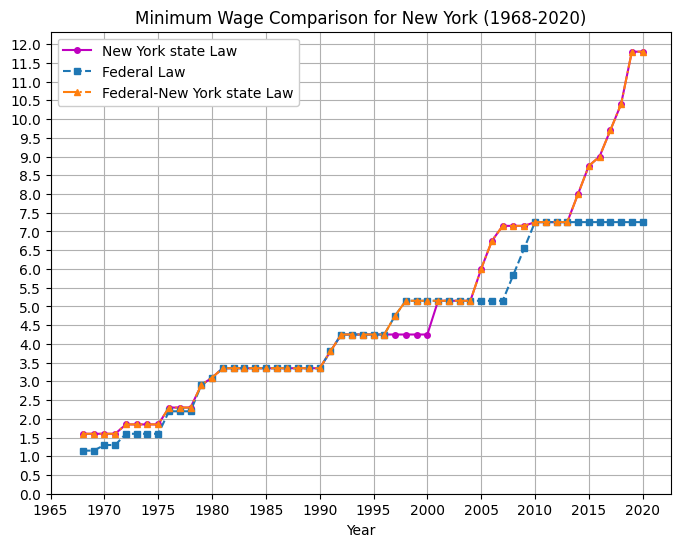

In [ ]:
state_compare(minimum_wage, 'New York')

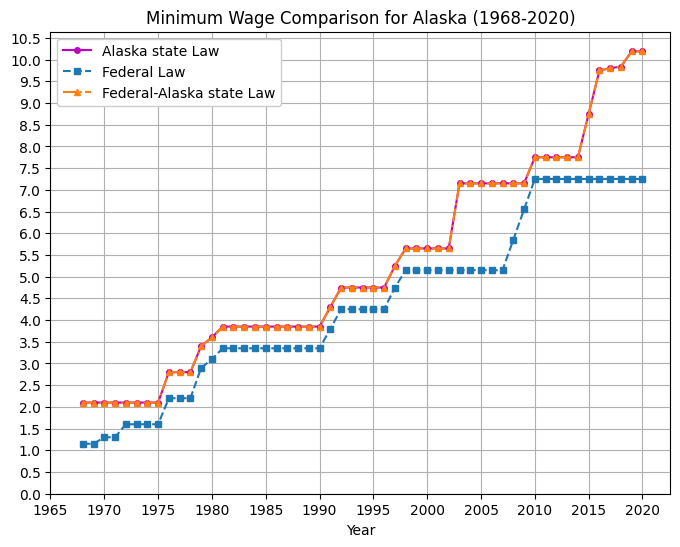

In [ ]:
state_compare(minimum_wage, 'Alaska')

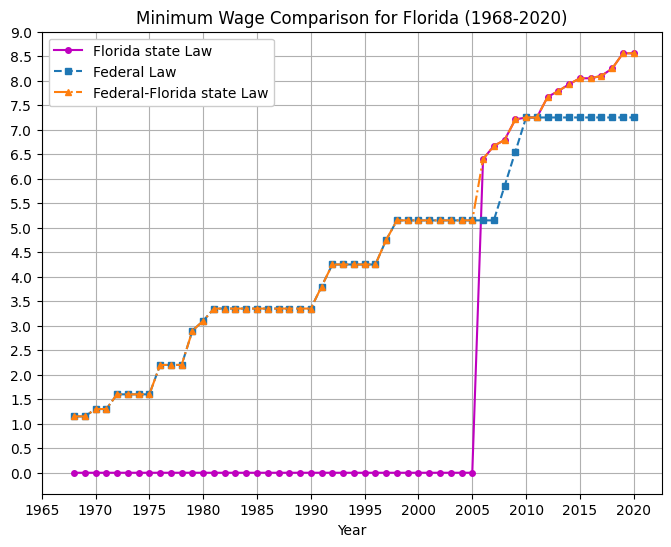

In [ ]:
state_compare(minimum_wage, 'Florida')

**Using the Consumer Price Index, wages are converted and explored wages based on their 2020 value equivalents.**

In [ ]:
# Find the maximum value in the 'cpi_average' column
max_cpi = minimum_wage['cpi_average'].max()

# Calculate 2020 equivalents for state and federal minimum wages based on CPI
minimum_wage['state_2020_equivalent'] = minimum_wage['state_minimum_wage'] * (max_cpi / minimum_wage['cpi_average'])
minimum_wage['fed_2020_equivalent'] = minimum_wage['federal_minimum_wage'] * (max_cpi / minimum_wage['cpi_average'])
minimum_wage['state_fed_2020_equivalent'] = minimum_wage['fed_state_wage'] * (max_cpi / minimum_wage['cpi_average'])

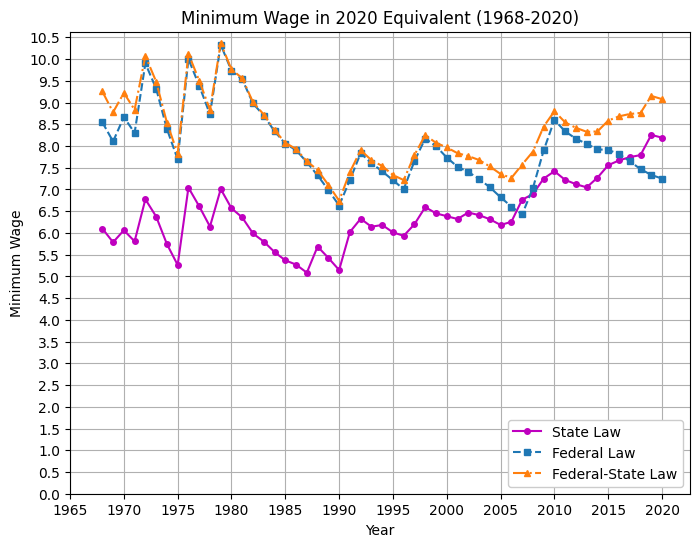

In [ ]:
# Calculate average state, federal, and combined minimum wage equivalents for each year
avg_state_wage_2020_eq = minimum_wage.groupby('year')['state_2020_equivalent'].mean().reset_index()
avg_federal_wage_2020_eq = minimum_wage.groupby('year')['fed_2020_equivalent'].mean().reset_index()
avg_combined_wage_2020_eq = minimum_wage.groupby('year')['state_fed_2020_equivalent'].mean().reset_index()

# Create a figure to compare minimum wages in 2020 equivalent amounts
plt.figure(figsize=(8, 6))
plt.plot(avg_state_wage_2020_eq['year'], avg_state_wage_2020_eq['state_2020_equivalent'], '-mo', label='State Law', markersize=4)
plt.plot(avg_federal_wage_2020_eq['year'], avg_federal_wage_2020_eq['fed_2020_equivalent'], '--s', label='Federal Law', markersize=4)
plt.plot(avg_combined_wage_2020_eq['year'], avg_combined_wage_2020_eq['state_fed_2020_equivalent'], '-.^', label='Federal-State Law', markersize=4)

# Customize y-axis ticks
plt.yticks(np.arange(0, max(avg_combined_wage_2020_eq['state_fed_2020_equivalent']) + 0.5, 0.5))

# Set labels, grid, and legend
plt.ylabel('Minimum Wage')
plt.xlabel('Year')
plt.xticks(range(1965, 2021, 5))
plt.grid(True)
plt.legend(loc='lower right', framealpha=1.0)
plt.title('Minimum Wage in 2020 Equivalent (1968-2020)')

plt.show()

In [ ]:
# Create a DataFrame containing only states with non-zero 'state_2020_equivalent' minimum wage
active_state_law_wage = minimum_wage[minimum_wage['state_2020_equivalent'] != 0]

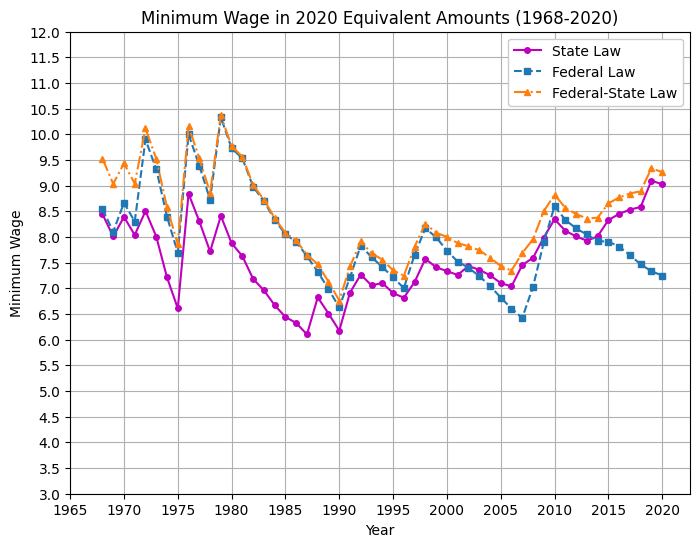

In [ ]:
# Calculate average state, federal, and combined minimum wage equivalents for active states
average_state_wage_2020_equivalent = active_state_law_wage.groupby('year')['state_2020_equivalent'].mean().reset_index()
average_federal_wage_2020_equivalent = active_state_law_wage.groupby('year')['fed_2020_equivalent'].mean().reset_index()
average_combined_wage_2020_equivalent = active_state_law_wage.groupby('year')['state_fed_2020_equivalent'].mean().reset_index()

# Create a plot to compare minimum wages in 2020 equivalent amounts
plt.figure(figsize=(8, 6))
plt.plot(average_state_wage_2020_equivalent['year'], average_state_wage_2020_equivalent['state_2020_equivalent'], '-mo', label='State Law', markersize=4)
plt.plot(average_federal_wage_2020_equivalent['year'], average_federal_wage_2020_equivalent['fed_2020_equivalent'], '--s', label='Federal Law', markersize=4)
plt.plot(average_combined_wage_2020_equivalent['year'], average_combined_wage_2020_equivalent['state_fed_2020_equivalent'], '-.^', label='Federal-State Law', markersize=4)

# Set labels, grid, and legend
plt.yticks(np.arange(3, max(average_combined_wage_2020_equivalent['state_fed_2020_equivalent']) + 2, 0.5))
plt.ylabel('Minimum Wage')
plt.xlabel('Year')
plt.xticks(range(1965, 2021, 5))
plt.grid(True)
plt.legend(framealpha=1.0)
plt.title('Minimum Wage in 2020 Equivalent Amounts (1968-2020)')

plt.show()

In [ ]:
# Function to display a histogram of state minimum wages for the target year

def state_wages(active_state_law_wage, year):
    # Filter data for the specified year
    filtered_data = active_state_law_wage[active_state_law_wage['year'] == year]

    # Create a figure fo comparing state minimum wage laws
    plt.figure(figsize=(8, 6))

    # Calculate the number of bins using the Freedman-Diaconis rule
    data_range = filtered_data['state_minimum_wage'].max() - filtered_data['state_minimum_wage'].min()
    iqr = np.percentile(filtered_data['state_minimum_wage'], 75) - np.percentile(filtered_data['state_minimum_wage'], 25)

    # Check if both iqr and the length of filtered_data are greater than zero
    if iqr > 0 and len(filtered_data) > 0:
        bin_width = 2 * iqr / (len(filtered_data) ** (1/3))
        num_bins = int(data_range / bin_width)
        # Check if num_bins is too low and set a minimum value
        if num_bins <= 6:
            num_bins = 6
    else:
        # Handle the case where iqr or length is zero
        num_bins = 6

    # Create a histogram of state minimum wage data
    plt.hist(filtered_data['state_minimum_wage'], bins=num_bins, edgecolor='black', color='lightgrey')

    # Set labels, grid, and legend
    plt.axvline(filtered_data['state_minimum_wage'].mean(), color='red', linestyle='solid', linewidth=3, label='Average')
    plt.axvline(filtered_data['state_minimum_wage'].mean() - np.std(filtered_data['state_minimum_wage']), color='blue', linestyle='dotted', linewidth=3, label='1 Standard Deviation')
    plt.axvline(filtered_data['state_minimum_wage'].mean() + np.std(filtered_data['state_minimum_wage']), color='blue', linestyle='dotted', linewidth=3)
    plt.axvline(filtered_data['state_minimum_wage'].mean() - (np.std(filtered_data['state_minimum_wage'] * 2)), color='green', linestyle='dotted', linewidth=3, label='2 Standard Deviations')
    plt.axvline(filtered_data['state_minimum_wage'].mean() + (np.std(filtered_data['state_minimum_wage'] * 2)), color='green', linestyle='dotted', linewidth=3)
    plt.xlabel('Minimum Wage Amount')
    plt.ylabel('Total States')
    plt.grid(axis='y', linestyle='--', alpha=0.9, color='grey')
    plt.title(f'U.S. States Minimum Wage Law Requirements for {year}')
    plt.legend(framealpha=1.0)

    plt.show()

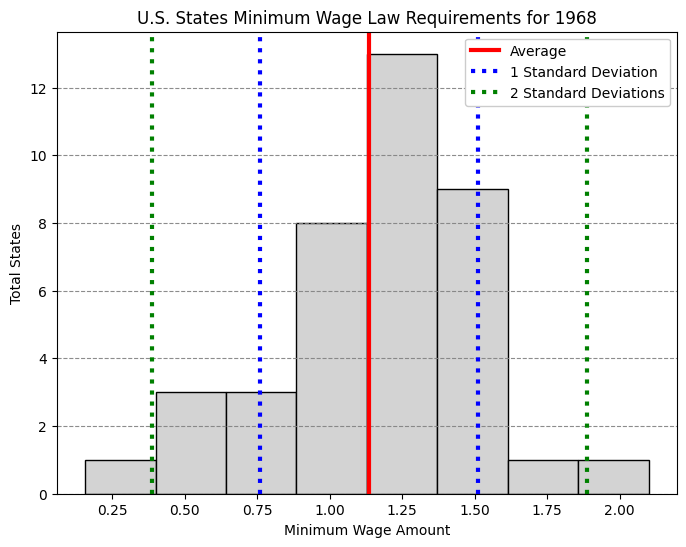

In [ ]:
state_wages(active_state_law_wage, 1968)

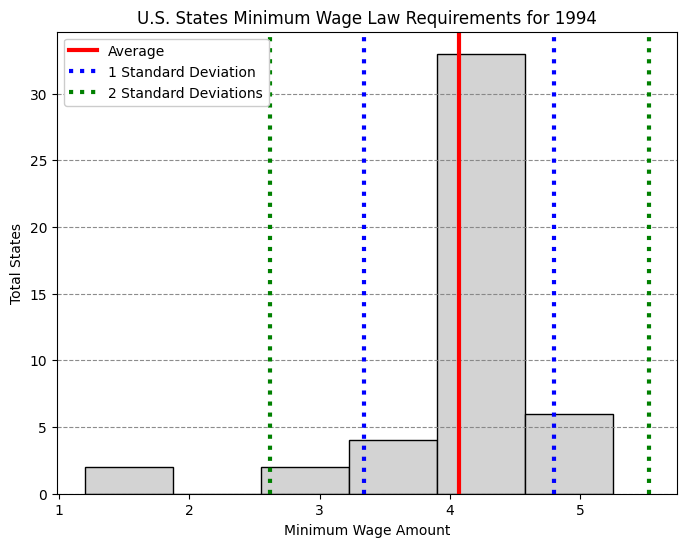

In [ ]:
state_wages(active_state_law_wage, 1994)

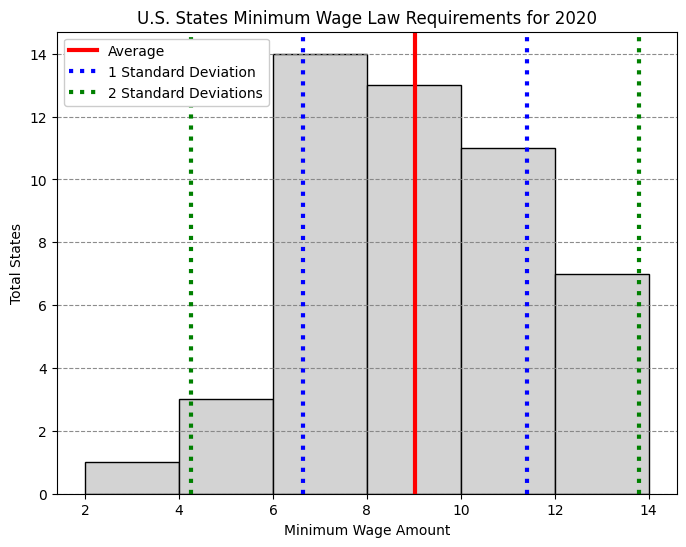

In [ ]:
state_wages(active_state_law_wage, 2020)

In [ ]:
# Display histogram of average state minimum wages (1968-2020) with the target state highlighted and run t-test.

def state_wages_allyears(minimum_wage, state):
    # Filter data for the specified state
    filtered_state_data = active_state_law_wage[active_state_law_wage['state'] == state]

    # Filter data for all other states (excluding the specified state)
    filtered_other_states_data = active_state_law_wage[active_state_law_wage['state'] != state]

    # Concatenate the two data frames vertically
    merged_data = pd.concat([filtered_state_data, filtered_other_states_data])

    # Check if the target state's law equals zero
    if filtered_state_data['state_minimum_wage'].sum() == 0:
        return f'{state} has no state required minimum wage. No comparison can be made.'

    # Calculate the average 'state_minimum_wage' for each state across all years
    average_wages_by_state = active_state_law_wage.groupby('state')['state_minimum_wage'].mean().reset_index()

    # Create a figure fo comparing states with minimum wage laws
    plt.figure(figsize=(8, 6))

    # Calculate the number of bins using the Freedman-Diaconis rule for all other states
    data_range = average_wages_by_state['state_minimum_wage'].max() - average_wages_by_state['state_minimum_wage'].min()
    iqr = np.percentile(average_wages_by_state['state_minimum_wage'], 75) - np.percentile(average_wages_by_state['state_minimum_wage'], 25)

    # Create a histogram of 'state_minimum_wage' for all other states
    plt.hist(
        average_wages_by_state['state_minimum_wage'],
        bins=10,
        alpha=0.5,
        edgecolor='black',
        color='grey',
        label='Other States Average Wage'
        )

    # Set labels, grid, and legend
    plt.axvline(filtered_state_data['state_minimum_wage'].mean(), color='red', linestyle='solid', linewidth=3, label=f'{state} Average')
    combined_mean = average_wages_by_state['state_minimum_wage'].mean()
    combined_std = average_wages_by_state['state_minimum_wage'].std()
    plt.axvline(combined_mean, color='blue', linestyle='solid', linewidth=3, label='Average All States')
    plt.axvline(combined_mean - combined_std, color='green', linestyle='dotted', linewidth=3, label='1 Standard Deviation')
    plt.axvline(combined_mean + combined_std, color='green', linestyle='dotted', linewidth=3)
    plt.axvline(combined_mean - (combined_std * 2), color='purple', linestyle='dotted', linewidth=3, label='2 Standard Deviations')
    plt.axvline(combined_mean + (combined_std * 2), color='purple', linestyle='dotted', linewidth=3)
    plt.xlabel('Average Minimum Wage Amount')
    plt.ylabel('Total States')
    plt.title(f'Minimum Wage Comparison for {state} vs. Other States 1968 - 2020')
    plt.legend(framealpha=1.0)

    plt.show()

    # Perform the one-sample t-test
    t_statistic, p_value = ttest_1samp(filtered_state_data['state_minimum_wage'], combined_mean)

    # Return a statement on the significant difference of the sample
    if p_value < 0.01:
        outcome = f'{state} is significantly different from other states.'
    else:
        outcome = f'{state} is not significantly different from other states.'

    return outcome

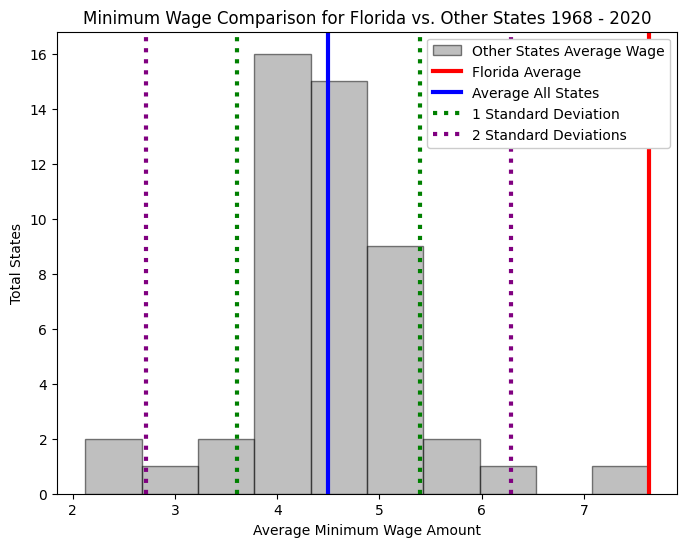

'Florida is significantly different from other states.'

In [ ]:
state_wages_allyears(minimum_wage, 'Florida')

^ Ain't that the truth!

In [ ]:
state_wages_allyears(minimum_wage, 'Mississippi')

'Mississippi has no state required minimum wage. No comparison can be made.'

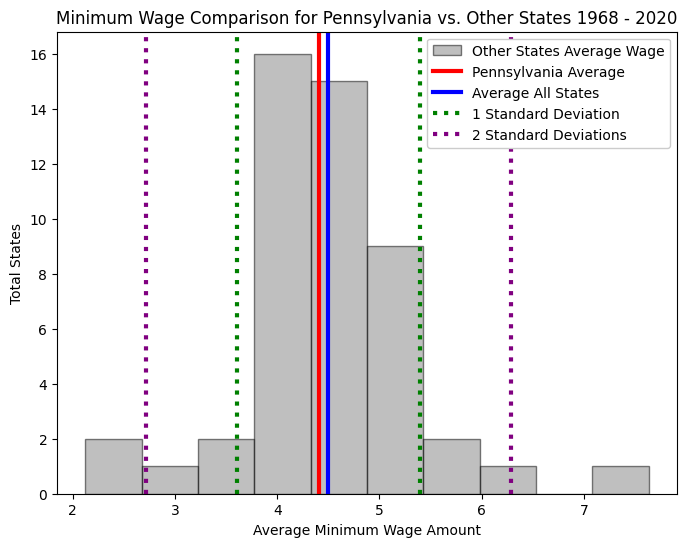

'Pennsylvania is not significantly different from other states.'

In [ ]:
state_wages_allyears(minimum_wage, 'Pennsylvania')

In [ ]:
# Function to run a t-test to determine if the minimum wage is significantly different for the target state.

def abbreviated_state_wages_allyears(minimum_wage, state):
    # Filter data for the specified state
    filtered_state_data = active_state_law_wage[active_state_law_wage['state'] == state]

    # Filter data for all other states (excluding the specified state)
    filtered_other_states_data = active_state_law_wage[active_state_law_wage['state'] != state]

    # Concatenate the two data frames vertically
    merged_data = pd.concat([filtered_state_data, filtered_other_states_data])

    # Check if the target state's law equals zero
    if filtered_state_data['state_minimum_wage'].sum() == 0:
        return

    # Calculate the average 'state_minimum_wage' for each state across all years
    average_wages_by_state = active_state_law_wage.groupby('state')['state_minimum_wage'].mean().reset_index()

    # Calculate the mean and standard deviation for all other states combined
    combined_mean = average_wages_by_state['state_minimum_wage'].mean()

    # Perform the one-sample t-test
    t_statistic, p_value = ttest_1samp(filtered_state_data['state_minimum_wage'], combined_mean)

    # Return a statement on the significant difference of the sample
    if p_value < 0.01 and filtered_state_data['state_minimum_wage'].mean() > combined_mean:
      outcome = f'{state} is significantly greater from other states.'
    elif p_value < 0.01 and filtered_state_data['state_minimum_wage'].mean() < combined_mean:
      outcome = f'{state} is significantly lower from other states.'
    else:
      return # No significant difference detected.

    return outcome

In [ ]:
outcomes = []  # Create an empty list to store outcomes

# Iterate through states to determine outcomes
for state in distinct_states:
    outcome = abbreviated_state_wages_allyears(minimum_wage, state)
    if outcome is not None:
        outcomes.append(outcome)

# Print outcomes
for outcome in outcomes:
    print(outcome)

Florida is significantly greater from other states.
Georgia is significantly lower from other states.
Iowa is significantly greater from other states.
Missouri is significantly greater from other states.
Oklahoma is significantly lower from other states.
Puerto Rico is significantly lower from other states.
Wyoming is significantly lower from other states.


In [ ]:
# Calculate the Pearson correlation coefficient for state, federal, and combined minimum wage laws.
correlation_state = minimum_wage['cpi_average'].corr(active_state_law_wage['state_minimum_wage'])
correlation_combined = minimum_wage['cpi_average'].corr(minimum_wage['fed_state_wage'])
correlation_fed = minimum_wage['cpi_average'].corr(minimum_wage['federal_minimum_wage'])

# Print correlation coefficients
print(f"Pearson Correlation Coefficient States Minimum Wage (excluding null values): {round(correlation_state, 2)}")
print(f"Pearson Correlation Coefficient Federal-State law Combined Minimum Wage: {round(correlation_combined, 2)}")
print(f"Pearson Correlation Coefficient Federal Minimum Wage: {round(correlation_fed, 2)}")

Pearson Correlation Coefficient States Minimum Wage (excluding null values): 0.89
Pearson Correlation Coefficient Federal-State law Combined Minimum Wage: 0.95
Pearson Correlation Coefficient Federal Minimum Wage: 0.98


The results demonstrate strong positive correlations between CPI and minimum wage laws, with the federal minimum wage law showing the strongest relationship.

In [ ]:
# Define the feature (X) and target (y) columns
X = minimum_wage[['cpi_average']]  # Features
y = minimum_wage['federal_minimum_wage']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.1271975586683374
R-squared: 0.9678419027965722


**The low MSE and high R-squared value support that the linear regression model is performing well and that there is a strong relationship between changes in the CPI and changes in the federal minimum wage.**

In [ ]:
# Calculate the average CPI by year
average_cpi_by_year = minimum_wage.groupby('year')['cpi_average'].mean().reset_index()

# Filter data for the year 2020
cpi_2020 = average_cpi_by_year[average_cpi_by_year['year'] == 2020]['cpi_average'].mean()

# Calculate the year-to-year change in CPI
average_cpi_by_year['cpi_change'] = average_cpi_by_year['cpi_average'].diff()

# Calculate the average increase in CPI per year
average_increase_per_year = average_cpi_by_year['cpi_change'].mean()

# Print the results
print(f"Average increase in CPI per year: {average_increase_per_year:.2f}")
print(f"CPI in the year 2020: {cpi_2020:.2f}")

# Create fuction for predicting federal minimum wage based on anticipated CPI.
def fed_wage_predict(cpi_value):
  # Create a DataFrame with the new CPI value
  new_data = pd.DataFrame({'cpi_average': [cpi_value]})

  # Use the trained model to make predictions
  predicted_wage = model.predict(new_data)

  # Print the predicted federal minimum wage
  print(f"Predicted Federal Minimum Wage in the year {2020 + timespan}: ${predicted_wage[0]:.2f}")


Average increase in CPI per year: 4.31
CPI in the year 2020: 258.66


In [ ]:
# Define a list of timespans (in years) for future predictions
future = [20, 30, 40, 1000]

# Iterate through the list of timespans
for timespan in future:
    # Calculate the new CPI value for the specified year
    cpi_value = cpi_2020 + (timespan * average_increase_per_year)

    # Predict the federal minimum wage for the specified year using the trained model
    fed_wage_predict(cpi_value)

Predicted Federal Minimum Wage in the year 2040: $9.88
Predicted Federal Minimum Wage in the year 2050: $11.07
Predicted Federal Minimum Wage in the year 2060: $12.27
Predicted Federal Minimum Wage in the year 3020: $126.85


# Some notable conclusions from the analysis of the minimum wage law data from 1968 to 2020:

- The CPI has increased on average by 4.31 per year and strongly correlates with Federal Minimum Wage law.

- Using linear regression, the anticipated increase in the federal minimum wage requirement is $9.88. However, graph analysis indicates that individual state minimum wage laws have experienced substantial growth over the last 20 years. This growth might diminish the actual impact of the next federal law increase when it occurs.

- Among states with minimum wage laws, six states and one U.S. Territory (Puerto Rico) were observed to be significantly different from other states.
  - Florida, Iowa, and Missouri had significantly higher minimum wages.
  - Georgia, Oklahoma, Wyoming, and Puerto Rico had significantly lower minimum wages.

- The U.S. minimum wage requirement, based on a combination of state and federal law, has increased from an average of \$1.25 in 1968 to an average of $9.08 in 2020.

- When only considering years when states have active minimum wage laws, Florida is observed to have the highest minimum wage requirement.

Based on 2020 equivalents:

  - Federal minimum wage laws have shown an overall flat trend. Although there were some acute increases and decreases, notably the decline from 1979 to 1990, since 1990 there has been a slight increasing trend. It's important to note that the minimum wage in 2020 is still less than its 1968 equivalent.

  - State minimum wage law averages have generally followed a similar pattern. However, the increasing trend since 1990 has been stronger, with an increasing number of states passing minimum wage requirements higher than the federal minimum wage law. Notably, Florida, which did not have a state law in effect until 2006, boasts the highest average minimum wage requirement among all states and territories.